# Clean building class
The building class contains some missclassified. Just like vegetation points above buildigs.<br>
To clean this building class, we will use some thresholds which were obtained by a single patch.

<b>This Jupyter-Notebook is part of a master thesis with the topic:<br>
    <i>Analysis of deep learning methods for semantic segmentation of photogrammetric point clouds from aerial images</i><br>
&copy; Markus Hülsen, Matr.-Nr. 6026370<br>
Date: 27.06.2023</b>

## Setting up 3D Python Context
Import the required libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import laspy
import os
import pandas as pd
from tqdm.notebook import tqdm 

## Import Data
Data is stored as `LAS`-file. We will use `laspy` to import und convert the data.<br>
First we create a function to import an `LAS`-File and convert them into a Pandas `DataFrame`.

In [31]:
def import_las_to_Dataframe(path):
    with laspy.open(path) as f:
        las = f.read()
    
    # read coordinates from las
    x = np.array(las.x)
    y = np.array(las.y)
    z = np.array(las.z)

    df = pd.DataFrame({'X':x,'Y':y,'Z':z},index=np.arange(len(x)))

    for i in range(3, len(las.point_format.dimensions)):
        dim = las.point_format.dimensions[i].name
        df[dim] = np.array(las[dim])
     
    return df

Express path where the data is stored, that we want to processed. <br>All `las`-Files inside the defined folder will be stored in a list.

In [32]:
# path where the data ist stored
data_path = '../../Daten/Datensatz_H3D/'
# sub-folder which includes different acquisition dates and types like 'DIM_2016', 'DIM_2019', 'DIM_2022', 'ALS2016', ...
data = 'DIM_2022/2 - Height above DEM'

# save files that are in laz-format
lst_files = []
for file in os.listdir(data_path + data):
    if file.endswith('.las'):
        lst_files.append(data_path + data + '/' + file)

lst_files = sorted(lst_files)        
print('Found', len(lst_files), 'las-files:')
print(lst_files)

Found 12 las-files:
['../../Daten/Datensatz_H3D/DIM_2022/2 - Height above DEM/554000_5798000.las', '../../Daten/Datensatz_H3D/DIM_2022/2 - Height above DEM/554000_5799000.las', '../../Daten/Datensatz_H3D/DIM_2022/2 - Height above DEM/554000_5800000.las', '../../Daten/Datensatz_H3D/DIM_2022/2 - Height above DEM/554000_5801000.las', '../../Daten/Datensatz_H3D/DIM_2022/2 - Height above DEM/555000_5798000.las', '../../Daten/Datensatz_H3D/DIM_2022/2 - Height above DEM/555000_5799000.las', '../../Daten/Datensatz_H3D/DIM_2022/2 - Height above DEM/555000_5800000.las', '../../Daten/Datensatz_H3D/DIM_2022/2 - Height above DEM/555000_5801000.las', '../../Daten/Datensatz_H3D/DIM_2022/2 - Height above DEM/556000_5798000.las', '../../Daten/Datensatz_H3D/DIM_2022/2 - Height above DEM/556000_5799000.las', '../../Daten/Datensatz_H3D/DIM_2022/2 - Height above DEM/556000_5800000.las', '../../Daten/Datensatz_H3D/DIM_2022/2 - Height above DEM/556000_5801000.las']


Define which file we want to use for this notebook

In [33]:
# define file we want to use
las_path = lst_files[-3]
las_path

'../../Daten/Datensatz_H3D/DIM_2022/2 - Height above DEM/556000_5799000.las'

Use function above to read the point cloud and convert it to pandas DataFrame.

In [34]:
# import data
df = import_las_to_Dataframe(las_path)

df

,X,Y,Z,intensity,return_number,number_of_returns,scan_direction_flag,edge_of_flight_line,classification,synthetic,key_point,withheld,scan_angle_rank,user_data,point_source_id,gps_time,red,green,blue,z_to_dem
0,556378.71,5799119.57,79.82,9899,7,7,0,0,2,0,0,0,-101,115,76,0.0,10240,15104,17408,0.297848
1,556390.50,5799171.78,79.26,9913,4,4,0,0,2,0,0,0,106,156,76,0.0,8448,14336,17408,0.312281
2,556390.40,5799150.80,79.46,16162,7,7,0,0,2,0,0,0,-125,144,78,0.0,39168,36352,32768,0.366547
3,556383.23,5799168.32,80.06,17698,4,4,0,0,2,0,0,0,101,166,49,0.0,11264,16384,18944,0.265495
4,556392.09,5799171.86,79.30,10781,5,5,0,0,2,0,0,0,-57,132,51,0.0,12800,17152,19712,0.236757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649012,556850.51,5799633.99,89.81,7824,2,2,0,0,13,0,0,0,117,189,48,0.0,22272,30720,20736,16.346535
5649013,556803.73,5799627.65,88.37,7536,5,5,0,0,13,0,0,0,-81,138,79,0.0,15616,20992,16384,14.435416
5649014,556840.79,5799640.24,86.97,7543,2,2,0,0,13,0,0,0,-114,145,79,0.0,12032,20224,15360,13.510356
5649015,556845.96,5799640.06,87.58,7829,1,1,0,0,13,0,0,0,122,120,48,0.0,8448,16384,15360,14.111296


## Datapreparation
Some of the features are not necessary/redudant. We will remove them.

In [35]:
print('Attribute:')
for column in df:
    if len(pd.unique(df[column])) == 1:
        print(str(column) + (25 - len(str(column))) * ' '  + 'contains just a single value and will be returned!')
        df = df.drop(column, axis=1)
    else:
        print(str(column) +  (25 - len(str(column))) * ' '  + 'will be maintained')

df

Attribute:
X                        will be maintained
Y                        will be maintained
Z                        will be maintained
intensity                will be maintained
return_number            will be maintained
number_of_returns        will be maintained
scan_direction_flag      contains just a single value and will be returned!
edge_of_flight_line      contains just a single value and will be returned!
classification           will be maintained
synthetic                contains just a single value and will be returned!
key_point                contains just a single value and will be returned!
withheld                 contains just a single value and will be returned!
scan_angle_rank          will be maintained
user_data                will be maintained
point_source_id          will be maintained
gps_time                 contains just a single value and will be returned!
red                      will be maintained
green                    will be maintained
blue 

,X,Y,Z,intensity,return_number,number_of_returns,classification,scan_angle_rank,user_data,point_source_id,red,green,blue,z_to_dem
0,556378.71,5799119.57,79.82,9899,7,7,2,-101,115,76,10240,15104,17408,0.297848
1,556390.50,5799171.78,79.26,9913,4,4,2,106,156,76,8448,14336,17408,0.312281
2,556390.40,5799150.80,79.46,16162,7,7,2,-125,144,78,39168,36352,32768,0.366547
3,556383.23,5799168.32,80.06,17698,4,4,2,101,166,49,11264,16384,18944,0.265495
4,556392.09,5799171.86,79.30,10781,5,5,2,-57,132,51,12800,17152,19712,0.236757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649012,556850.51,5799633.99,89.81,7824,2,2,13,117,189,48,22272,30720,20736,16.346535
5649013,556803.73,5799627.65,88.37,7536,5,5,13,-81,138,79,15616,20992,16384,14.435416
5649014,556840.79,5799640.24,86.97,7543,2,2,13,-114,145,79,12032,20224,15360,13.510356
5649015,556845.96,5799640.06,87.58,7829,1,1,13,122,120,48,8448,16384,15360,14.111296


Drop attributes that are not necessary for segmentation.

In [36]:
# Delete all attirbute in this list
del_atts = ['return_number', 'point_source_id']

df = df.drop(del_atts, axis=1, errors='ignore')

df

,X,Y,Z,intensity,number_of_returns,classification,scan_angle_rank,user_data,red,green,blue,z_to_dem
0,556378.71,5799119.57,79.82,9899,7,2,-101,115,10240,15104,17408,0.297848
1,556390.50,5799171.78,79.26,9913,4,2,106,156,8448,14336,17408,0.312281
2,556390.40,5799150.80,79.46,16162,7,2,-125,144,39168,36352,32768,0.366547
3,556383.23,5799168.32,80.06,17698,4,2,101,166,11264,16384,18944,0.265495
4,556392.09,5799171.86,79.30,10781,5,2,-57,132,12800,17152,19712,0.236757
...,...,...,...,...,...,...,...,...,...,...,...,...
5649012,556850.51,5799633.99,89.81,7824,2,13,117,189,22272,30720,20736,16.346535
5649013,556803.73,5799627.65,88.37,7536,5,13,-81,138,15616,20992,16384,14.435416
5649014,556840.79,5799640.24,86.97,7543,2,13,-114,145,12032,20224,15360,13.510356
5649015,556845.96,5799640.06,87.58,7829,1,13,122,120,8448,16384,15360,14.111296


## Point Cloud Filtering

### Reduce area of the Pointcloud
For testing purposes, the size of the point cloud can be reduced to speed up calculations.<br>
To reduce the number of points within the pointcloud, we will create a Bounding-Box to select a smaller areas of the pointcloud.

In [37]:
# Bounding Box
bbox_x1 = df.X.min()
bbox_y1 = df.Y.min()
bbox_x2 = (df.X.max() + df.X.min())# / 2
bbox_y2 = (df.Y.max() + df.Y.min())# / 2

# Select Point inside of Bounding Box
df_sub = df.loc[(df.X >= bbox_x1) & (df.Y >= bbox_y1) & (df.X <= bbox_x2) & (df.Y <= bbox_y2)]

print('Check Results')
print('X min:', df_sub.X.min(), 'X max:', df_sub.X.max())
print('Y min:', df_sub.Y.min(), 'Y max:', df_sub.Y.max())

df_sub

Check Results
X min: 556000.0 X max: 556999.96
Y min: 5798999.75 Y max: 5799999.74


,X,Y,Z,intensity,number_of_returns,classification,scan_angle_rank,user_data,red,green,blue,z_to_dem
0,556378.71,5799119.57,79.82,9899,7,2,-101,115,10240,15104,17408,0.297848
1,556390.50,5799171.78,79.26,9913,4,2,106,156,8448,14336,17408,0.312281
2,556390.40,5799150.80,79.46,16162,7,2,-125,144,39168,36352,32768,0.366547
3,556383.23,5799168.32,80.06,17698,4,2,101,166,11264,16384,18944,0.265495
4,556392.09,5799171.86,79.30,10781,5,2,-57,132,12800,17152,19712,0.236757
...,...,...,...,...,...,...,...,...,...,...,...,...
5649012,556850.51,5799633.99,89.81,7824,2,13,117,189,22272,30720,20736,16.346535
5649013,556803.73,5799627.65,88.37,7536,5,13,-81,138,15616,20992,16384,14.435416
5649014,556840.79,5799640.24,86.97,7543,2,13,-114,145,12032,20224,15360,13.510356
5649015,556845.96,5799640.06,87.58,7829,1,13,122,120,8448,16384,15360,14.111296


### Just consider class `Building`
We just want to take a look on the point cloud that is classified as `Building` which is equal to `classification = 6`

In [38]:
df_building = df_sub.loc[df_sub.classification == 6.].drop('classification', axis=1)
df_building

,X,Y,Z,intensity,number_of_returns,scan_angle_rank,user_data,red,green,blue,z_to_dem
2727735,556285.18,5799042.48,79.95,10434,1,76,178,23040,22528,21760,0.331306
2727736,556279.85,5799042.16,79.94,9006,3,-96,131,28928,31744,24576,0.277643
2727737,556265.20,5799025.41,79.89,12793,3,92,171,47616,47616,46336,0.287573
2727738,556352.72,5799191.62,79.42,16121,7,96,94,46848,45312,43008,0.317805
2727739,556353.34,5799191.51,79.45,16610,5,87,117,46080,45312,42496,0.322504
...,...,...,...,...,...,...,...,...,...,...,...
5643672,556846.29,5799794.31,76.59,7784,2,116,125,16384,17408,18176,3.023771
5643673,556832.53,5799809.60,76.60,7776,3,115,127,46848,49408,49664,2.831621
5643674,556825.02,5799818.10,76.96,7644,7,122,125,40960,41728,41984,2.615167
5643675,556858.90,5799825.51,76.53,7648,4,-126,118,38656,39680,39936,3.086225


### Convert Colors
To get an more intuitiv colormodel, we will convert the RGB-colors to the HSV-colorspace.

Change Color from 16bit to 8bit

In [39]:
r,g,b = df_building.loc[:, 'red':'blue'].to_numpy().T
r, g ,b = (r/256).astype('uint8'), (g/256).astype('uint8'), (b/256).astype('uint8')
rgb = np.array([r,g,b]).T
print('RGB:\n', rgb)

RGB:
 [[ 90  88  85]
 [113 124  96]
 [186 186 181]
 ...
 [160 163 164]
 [151 155 156]
 [127 137 137]]


Normalize colors

In [40]:
rgb_norm = rgb/256

Convert the RGB values to HSV color space

In [41]:
import colorsys

In [42]:
hsv_norm = np.apply_along_axis(lambda x: colorsys.rgb_to_hsv(*x), -1, rgb_norm)
hsv_norm

array([[0.1       , 0.05555556, 0.3515625 ],
       [0.23214286, 0.22580645, 0.484375  ],
       [0.16666667, 0.02688172, 0.7265625 ],
       ...,
       [0.54166667, 0.02439024, 0.640625  ],
       [0.53333333, 0.03205128, 0.609375  ],
       [0.5       , 0.0729927 , 0.53515625]])

## Compute Geometric Features
Compution of the geometric feature of the point cloud using the some own Librarys.

In [43]:
from sklearn.neighbors import KDTree

### Define kNN with KDTree
Define the k-Nearest-Neighbors using the `KD-Tree` inside of the `sklearn` libary.<br>First we will use `K=80`

In [44]:
X = df_sub.loc[:,'X':'Z']
X

,X,Y,Z
0,556378.71,5799119.57,79.82
1,556390.50,5799171.78,79.26
2,556390.40,5799150.80,79.46
3,556383.23,5799168.32,80.06
4,556392.09,5799171.86,79.30
...,...,...,...
5649012,556850.51,5799633.99,89.81
5649013,556803.73,5799627.65,88.37
5649014,556840.79,5799640.24,86.97
5649015,556845.96,5799640.06,87.58


Convert DataFrame to Numpy Array

In [45]:
xyz = X.to_numpy()
xyz

array([[5.56378710e+05, 5.79911957e+06, 7.98200000e+01],
       [5.56390500e+05, 5.79917178e+06, 7.92600000e+01],
       [5.56390400e+05, 5.79915080e+06, 7.94600000e+01],
       ...,
       [5.56840790e+05, 5.79964024e+06, 8.69700000e+01],
       [5.56845960e+05, 5.79964006e+06, 8.75800000e+01],
       [5.56843930e+05, 5.79964438e+06, 8.66200000e+01]])

#### KD-Tree
Now let's builds a KD-Tree for faster compution and get the Nearest Neighbors.<br>
The number of neighbors `K` will be defined by `80`

In [46]:
#number of nearest neighbors
K=80
# build KD-Tree
kdt = KDTree(X, leaf_size=40, metric='euclidean')

# get the indices of the K-Nearest neighbours
indices = kdt.query(X, k=K, return_distance=False)

print('Indices:\n', indices)

Indices:
 [[      0 2733387      54 ...  237004  237188  247745]
 [      1      14 2730892 ...      87  236967  237143]
 [      2      66      78 ...  237764  236479  236097]
 ...
 [5649014 5647920 5648455 ... 5645639 5644524 5645153]
 [5649015 5646808 5646421 ... 5645494 5648880 5646330]
 [5649016 5645827 5648034 ... 5646122 5646621 5645458]]


Now create a 3D numpy array, which contains the indices of the points with class `6 = building`, with the corrisponding nearest neighbors.

In [47]:
# Estimate position of points with class = 6
pos_class6 = df_sub.loc[df_sub.classification == 6].index.to_numpy()
pos_class6

array([2727735, 2727736, 2727737, ..., 5643674, 5643675, 5643676],
      dtype=int64)

### Save features to DataFrame
Now we want to save the calculated features to a separate DataFrame.<br>
We will use the `Hue`, the `Saturation` and the Standarddeviation of the z-coordinate (`std_z`).

In [48]:
df_features = pd.DataFrame({'Hue': hsv_norm[:,0], 
                            'Saturation': hsv_norm[:,1], 
                            'std_z': xyz[indices][pos_class6].std(1)[:,2]})
df_features = df_features.set_index(pos_class6)
df_features

,Hue,Saturation,std_z
2727735,0.100000,0.055556,0.780245
2727736,0.232143,0.225806,0.305729
2727737,0.166667,0.026882,1.060589
2727738,0.100000,0.081967,0.241272
2727739,0.130952,0.077778,0.234563
...,...,...,...
5643672,0.571429,0.098592,0.093362
5643673,0.515152,0.056701,0.105190
5643674,0.541667,0.024390,0.020124
5643675,0.533333,0.032051,0.062384


### Visualize the computed features
To get a better understanding if the calculated features contain valuable information we will visualize them in some <b>histograms</b> and <b>correlation plots</b>.

In [49]:
# function creates some histograms for every Feature we have inside our dataframe. 
# As input the function takes the DataFrame and the number of columns the plot should have.
def features_to_hist(df, cols):
    # number of attributes
    num_atts = len(df.columns)
    
    # number of rows in plot depends on number of attributes and number of columns
    if num_atts%cols == 0:
        rows = num_atts//cols
    else:
        rows = num_atts//cols + 1
    
    fig, axs = plt.subplots(rows, cols, figsize=(10*cols, 6*rows))

    # counter, to estimate the position in plot
    hist_col = 0
    hist_row = 0

    for column in df:
        data = df.loc[:,column]
    
        axs[hist_row][hist_col].hist(data.to_numpy(), bins=35)
        axs[hist_row][hist_col].set_title(column)
    
        hist_col += 1
    
        if hist_col >= cols:
            hist_col = 0
            hist_row += 1

            
# function creates a plot wich visualizes the correlation between attibutes.
# as input the function takes a DataFrame with the correlation and the figsize.
def visualize_correlation(df_corr, fig_size):
    # takes the Correlation-DataFrame as Input
    
    corr_array = df_corr.to_numpy()

    fig, ax = plt.subplots(figsize=(fig_size, fig_size))
    im = ax.imshow(corr_array)
    
    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(df_corr.columns)))
    ax.set_xticklabels(df_corr.columns)
    ax.set_yticks(np.arange(len(df_corr.columns)))
    ax.set_yticklabels(df_corr.columns)
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    for i in range(len(df_corr.columns)):
        for j in range(len(df_corr.columns)):
            text = ax.text(j, i, round(corr_array[i, j], 2),
                           ha="center", va="center", color="w")
    
    ax.set_title("Correlation between attributes")
    fig.tight_layout()
    plt.show()

### Combine all Features
Now lets combine the calculated and observed features to new DataFrame.

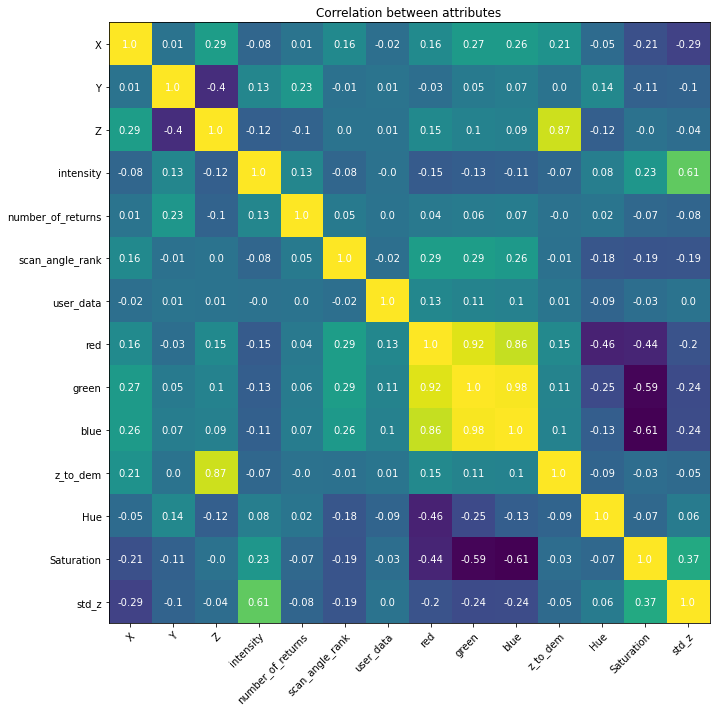

,X,Y,Z,intensity,number_of_returns,scan_angle_rank,user_data,red,green,blue,z_to_dem,Hue,Saturation,std_z
2727735,556285.18,5799042.48,79.95,10434,1,76,178,23040,22528,21760,0.331306,0.100000,0.055556,0.780245
2727736,556279.85,5799042.16,79.94,9006,3,-96,131,28928,31744,24576,0.277643,0.232143,0.225806,0.305729
2727737,556265.20,5799025.41,79.89,12793,3,92,171,47616,47616,46336,0.287573,0.166667,0.026882,1.060589
2727738,556352.72,5799191.62,79.42,16121,7,96,94,46848,45312,43008,0.317805,0.100000,0.081967,0.241272
2727739,556353.34,5799191.51,79.45,16610,5,87,117,46080,45312,42496,0.322504,0.130952,0.077778,0.234563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5643672,556846.29,5799794.31,76.59,7784,2,116,125,16384,17408,18176,3.023771,0.571429,0.098592,0.093362
5643673,556832.53,5799809.60,76.60,7776,3,115,127,46848,49408,49664,2.831621,0.515152,0.056701,0.105190
5643674,556825.02,5799818.10,76.96,7644,7,122,125,40960,41728,41984,2.615167,0.541667,0.024390,0.020124
5643675,556858.90,5799825.51,76.53,7648,4,-126,118,38656,39680,39936,3.086225,0.533333,0.032051,0.062384


In [50]:
df_features = pd.merge(df_building, df_features, left_index=True, right_index=True)
visualize_correlation(df_features.dropna().corr(), 10)
df_features

#### Histograms of the Features

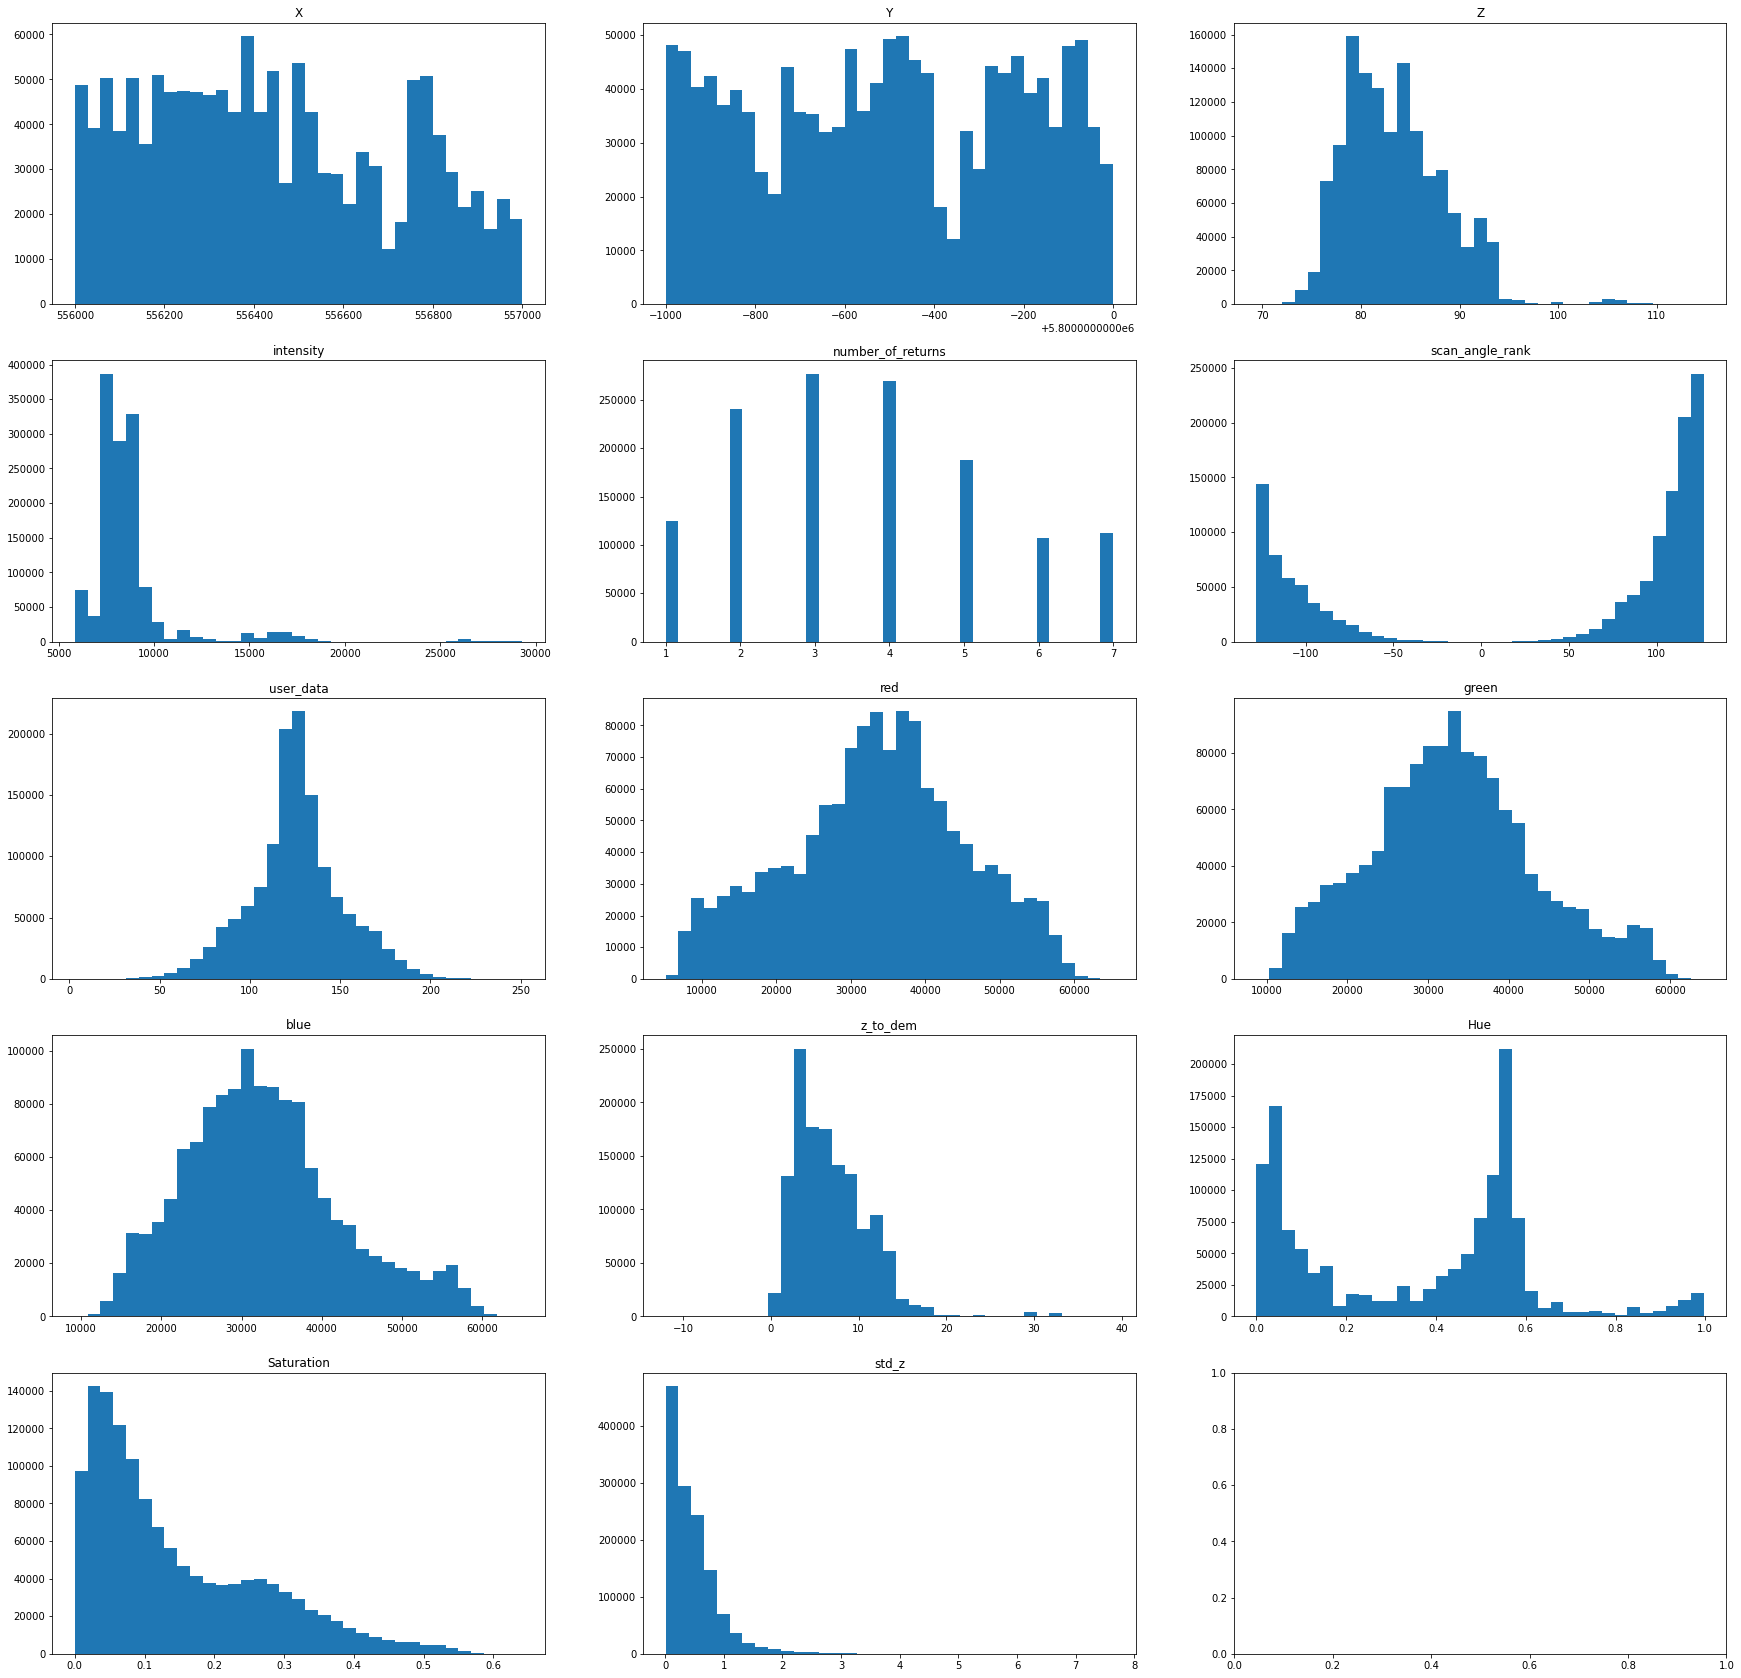

In [51]:
features_to_hist(df_features.dropna(), cols=3)

## Seperation of trees using threshold
If we look at all the calculated features we will notice, that the characteristics of the tree-points will differ from building-points. <br>
We can select different thresholds to seperate the tree points from the buildingpoints. Actually they are:

- `z_to_dem > 4.0`
- `0.17 < Hue < 0.49`
- `0.16 < Saturation < 0.6`
- `std_z > 0.20`

If we select exactly the points that meet these conditions, we hopefully get the points belonging to trees.

In [52]:
df_trees = df_features.loc[(df_features.z_to_dem > 4) & 
                           (df_features.Hue >= 0.17) &
                           (df_features.Hue < 0.49) &  
                           (df_features.std_z > 0.20) & 
                           (df_features.Saturation >= 0.16) & 
                           (df_features.Saturation < 0.6)]
df_trees

,X,Y,Z,intensity,number_of_returns,scan_angle_rank,user_data,red,green,blue,z_to_dem,Hue,Saturation,std_z
2730735,556390.44,5799148.49,84.28,18143,2,117,155,28160,30208,24320,5.000726,0.224638,0.194915,0.753479
2736386,556275.08,5799010.40,86.98,18250,6,-85,164,36352,40192,29952,7.195155,0.229167,0.254777,0.792284
2736397,556258.72,5799028.78,85.74,9708,1,93,131,21504,28928,22784,5.950407,0.362069,0.256637,1.646824
2736402,556284.33,5799007.73,88.92,16728,3,75,114,32512,34816,26624,9.234047,0.213542,0.235294,0.953870
2736433,556257.88,5799028.71,88.48,9247,4,76,106,30208,36352,29952,8.688366,0.326667,0.176056,1.586249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640172,556837.68,5799826.13,78.27,7761,1,-77,120,14336,21504,18688,4.440609,0.434524,0.333333,0.603569
5641093,556837.68,5799824.92,78.40,7761,5,115,123,10496,17920,13568,4.745296,0.402299,0.414286,0.208994
5641842,556837.99,5799825.58,78.40,7760,5,127,130,19712,28928,25600,4.682841,0.439815,0.318584,0.452735
5643279,556837.81,5799825.98,78.36,7760,2,-88,127,18176,26368,23040,4.551416,0.432292,0.310680,0.556319


We expect, that the points we selected priviosly are vegetation points, instead of building points. <br>
We will change the classification from `building = 6` to `Vegetation = 20`.

In [53]:
df_sub.loc[df_trees.index, 'classification'] = 20

print('check results: ')
df_sub.loc[df_sub.classification == 20]

check results: 


,X,Y,Z,intensity,number_of_returns,classification,scan_angle_rank,user_data,red,green,blue,z_to_dem
2730735,556390.44,5799148.49,84.28,18143,2,20,117,155,28160,30208,24320,5.000726
2736386,556275.08,5799010.40,86.98,18250,6,20,-85,164,36352,40192,29952,7.195155
2736397,556258.72,5799028.78,85.74,9708,1,20,93,131,21504,28928,22784,5.950407
2736402,556284.33,5799007.73,88.92,16728,3,20,75,114,32512,34816,26624,9.234047
2736433,556257.88,5799028.71,88.48,9247,4,20,76,106,30208,36352,29952,8.688366
...,...,...,...,...,...,...,...,...,...,...,...,...
5640172,556837.68,5799826.13,78.27,7761,1,20,-77,120,14336,21504,18688,4.440609
5641093,556837.68,5799824.92,78.40,7761,5,20,115,123,10496,17920,13568,4.745296
5641842,556837.99,5799825.58,78.40,7760,5,20,127,130,19712,28928,25600,4.682841
5643279,556837.81,5799825.98,78.36,7760,2,20,-88,127,18176,26368,23040,4.551416


## Save Results

### Write new LAS-File
Define export Path

In [54]:
file = las_path.split('/')[-1]
file

'556000_5799000.las'

In [55]:
path = las_path.replace(las_path.split('/')[-1], '').replace('2 - Height above DEM', '3 - clean_buildings')
export_pc = path + file

export_pc

'../../Daten/Datensatz_H3D/DIM_2022/3 - clean_buildings/556000_5799000.las'

Check if folder already exists. <br> If not, create a new one.

In [56]:
if not os.path.isdir(path):
    os.makedirs(path)
    print('created new folder', export_path)
else:
    print(path, 'already exists')

../../Daten/Datensatz_H3D/DIM_2022/3 - clean_buildings/ already exists


Function to export a DataFrame to an las-file.

In [57]:
def save_df_to_las(df, path):
    
    header = laspy.LasHeader(point_format=3, version="1.2")
    
    atts = []
    for dim in header.point_format.dimensions:
        atts.append(dim.name)
    
    for dim in df.columns:
        if dim not in atts:
            header.add_extra_dim(laspy.ExtraBytesParams(name=dim, type=np.float32))
    
    las_new = laspy.LasData(header)

    las_new.x = df.X.to_numpy()
    las_new.y = df.Y.to_numpy()
    las_new.z = df.Z.to_numpy()
    
    for col in df.loc[:,'intensity':].columns:
        las_new[col] = df[col].to_numpy()
    
    las_new.write(path)
    print('LAS file has been exported to ', path)

Export the cleaned pointcloud.

In [58]:
save_df_to_las(df_sub, export_pc)

LAS file has been exported to  ../../Daten/Datensatz_H3D/DIM_2022/3 - clean_buildings/556000_5799000.las
